# **Análise de dados: Programa Minha Casa Minha Vida 2024**

1. Definição do problema e Objetivo;
2. Preparação e Coleta dos Dados;
3. Análise Exploratória;
4. Interpretação dos Resultados.

# **Definição do Problema**
A análise detalhada do programa servirá como um exercício prático para aplicarmos os conceitos aprendidos em análise de dados, permitindo-nos mapear sua implementação, avaliar sua evolução e identificar seus impactos socioeconômicos.

# **Objetivo**
Desenvolver habilidades básicas de manipulação e análise de dados utilizando a linguagem Python. Através da análise de um conjunto de dados do Programa Minha Casa Minha Vida, este projeto busca consolidar os conhecimentos em bibliotecas como Pandas e NumPy. 

# **Preparação**
- A fase de importação das biliotecas e paleta de cores a serem utilizadas no projeto

In [3]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Paleta de cores aplicada
sns.color_palette("rocket")

[(0.20973515, 0.09747934, 0.24238489),
 (0.43860848, 0.12177004, 0.34119475),
 (0.67824099, 0.09192342, 0.3504148),
 (0.8833417, 0.19830556, 0.26014181),
 (0.95381595, 0.46373781, 0.31769923),
 (0.96516917, 0.70776351, 0.5606593)]

# **Coleta dos Dados**
- Os dados coletados estão em formato csv e estarão anexados em sua forma original no repositório para a visualização de todos.

In [5]:
df = pd.read_csv('dados.csv', sep='|')
display(df)

,"data_referencia|""cod_ibge""|""txt_municipio""|""txt_uf""|""num_ano_financiamento""|""qtd_uh_financiadas""|""vlr_financiamento""|""vlr_subsidio"""
0,"01/11/2024|110.001|Alta Floresta D'Oeste |RO|""..."
1,"01/11/2024|110.001|Alta Floresta D'Oeste |RO|""..."
2,"01/11/2024|110.001|Alta Floresta D'Oeste |RO|""..."
3,"01/11/2024|110.001|Alta Floresta D'Oeste |RO|""..."
4,"01/11/2024|110.001|Alta Floresta D'Oeste |RO|""..."
...,...
57854,"01/11/2024|530.010|Brasília |DF|""2020""|3.742|3..."
57855,"01/11/2024|530.010|Brasília |DF|""2021""|3.846|3..."
57856,"01/11/2024|530.010|Brasília |DF|""2022""|4.223|5..."
57857,"01/11/2024|530.010|Brasília |DF|""2023""|5.526|9..."


# **Preparação**
- Os dados originais estão apresentados em uma única coluna, contendo informações irrelevantes e formatos inadequados para análise estatística. Para transformar esses dados em um conjunto de dados utilizável será necessário realizar um processo de limpeza e transformação. Nas próximas etapas será detalhado os passos necessários para preparar os dados para a análise.

In [6]:
# Divisão das colunas
df[["data_referencia", "cod_ibge", "txt_municipio", "txt_uf", 
    "num_ano_financiamento", "qtd_uh_financiadas", "vlr_financiamento", "vlr_subsidio"]] = (
    df['data_referencia|"cod_ibge"|"txt_municipio"|"txt_uf"|"num_ano_financiamento"|"qtd_uh_financiadas"|"vlr_financiamento"|"vlr_subsidio"']
    .str.split("|", expand=True)
)
# Removendo a coluna indesejada
df.drop(columns=['data_referencia|"cod_ibge"|"txt_municipio"|"txt_uf"|"num_ano_financiamento"|"qtd_uh_financiadas"|"vlr_financiamento"|"vlr_subsidio"'], inplace=True)
# Verificando o resultado
display(df)

,data_referencia,cod_ibge,txt_municipio,txt_uf,num_ano_financiamento,qtd_uh_financiadas,vlr_financiamento,vlr_subsidio
0,01/11/2024,110.001,Alta Floresta D'Oeste,RO,"""2009""",2,106.000,28.406
1,01/11/2024,110.001,Alta Floresta D'Oeste,RO,"""2010""",11,"598.983,79",129.620
2,01/11/2024,110.001,Alta Floresta D'Oeste,RO,"""2011""",9,"450.560,2",35.436
3,01/11/2024,110.001,Alta Floresta D'Oeste,RO,"""2012""",26,"1.711.299,54","532.644,3999999999"
4,01/11/2024,110.001,Alta Floresta D'Oeste,RO,"""2013""",33,"2.331.474,5400000005","690.322,69"
...,...,...,...,...,...,...,...,...
57854,01/11/2024,530.010,Brasília,DF,"""2020""",3.742,"387.457.013,4600002","87.050.495,4100001"
57855,01/11/2024,530.010,Brasília,DF,"""2021""",3.846,"391.480.006,53000003","90.271.195,58999997"
57856,01/11/2024,530.010,Brasília,DF,"""2022""",4.223,"563.184.030,8500001","87.469.174,20000002"
57857,01/11/2024,530.010,Brasília,DF,"""2023""",5.526,"908.294.271,3199998","114.790.139,27000003"


- Na coluna num_ano_financiamento serão removidas as aspas para a melhor visualização dos dados, juntamente com a remoção da coluna cod_ibge que é irrelevante para esta análise.

In [7]:
# Remoção das aspas na coluna num_ano_financiamento
df['num_ano_financiamento'] = (df['num_ano_financiamento'].astype(str).str.replace('"', ''))
# Remoção de coluna irrelevante
df = df.drop(columns=['cod_ibge'])

- Segue abaixo a conversão dos dados para os tipos apropriados, visando facilitar o processamento posteriormente.

In [8]:
# Conversão dos dados
df['data_referencia'] = pd.to_datetime(df['data_referencia'], format='%d/%m/%Y')
df['num_ano_financiamento'] = df['num_ano_financiamento'].astype(int)
df['qtd_uh_financiadas'] = pd.to_numeric(df['qtd_uh_financiadas'])

- Nas colunas de moeda brasileira, são apresentadas várias casas decimais será necessário uma formatação minusiosa para estas.

In [9]:
# Formatação e conversão da coluna vlr_financiaamento
df['vlr_financiamento'] = df['vlr_financiamento'].str.replace(r'(?<=\d)\.(?=\d{3})', '', regex=True) 
df['vlr_financiamento'] = df['vlr_financiamento'].str.replace(',', '.', regex=True)
df['vlr_financiamento'] = pd.to_numeric(df['vlr_financiamento'], errors='coerce')
# A mesma formatação para a coluna vlr_subsidio
df['vlr_subsidio'] = df['vlr_subsidio'].str.replace(r'(?<=\d)\.(?=\d{3})', '', regex=True)  
df['vlr_subsidio'] = df['vlr_subsidio'].str.replace(',', '.', regex=True)
df['vlr_subsidio'] = pd.to_numeric(df['vlr_subsidio'], errors='coerce')

In [10]:
# Verificando os resultados da conversão
df.dtypes

data_referencia          datetime64[ns]
txt_municipio                    object
txt_uf                           object
num_ano_financiamento             int64
qtd_uh_financiadas              float64
vlr_financiamento               float64
vlr_subsidio                    float64
dtype: object

# **Análise Exploratória**
Nesta etapa, realizaremos uma análise exploratória dos dados para identificar padrões e insights relevantes sobre o tema.

In [11]:
print(f'Há cerca de {df["qtd_uh_financiadas"].sum():.0f} unidades habitacionais financiadas.')

Há cerca de 3117203 unidades habitacionais financiadas.


**Para visualizarmos a distribuição das unidades habitacionais financiadas por estado, apresentamos o gráfico de barras abaixo.**

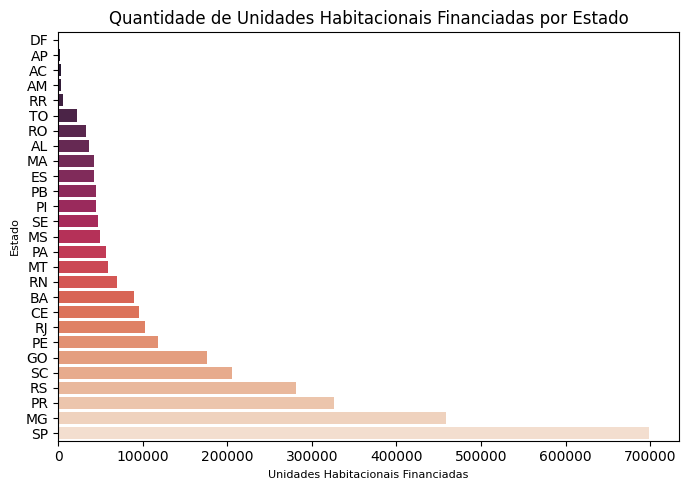

In [12]:
# Criação do Gráfico
total_uh_financiadas = df.groupby('txt_uf')['qtd_uh_financiadas'].sum().reset_index()
total_uh_financiadas_ranking = total_uh_financiadas.sort_values(by='qtd_uh_financiadas', ascending=True)
plt.figure(figsize=(7, 5))
sns.barplot(x='qtd_uh_financiadas', y='txt_uf', data=total_uh_financiadas_ranking, orient='h', hue='txt_uf', palette='rocket')
plt.title('Quantidade de Unidades Habitacionais Financiadas por Estado', fontsize=12)
plt.xlabel('Unidades Habitacionais Financiadas', fontsize=8)
plt.ylabel('Estado', fontsize=8)
plt.tight_layout()
plt.show()

In [13]:
total_uh_financiadas = df.groupby('txt_uf')['qtd_uh_financiadas'].sum()
print(f'O estado com o maior número de unidades habitacionais financiadas é {total_uh_financiadas.idxmax()} com aproximadamente {total_uh_financiadas.max()} unidades.\nO estado com o menor número é {total_uh_financiadas.idxmin()} com aproximadamente {total_uh_financiadas.min()} unidades.')

O estado com o maior número de unidades habitacionais financiadas é SP com aproximadamente 699042.065 unidades.
O estado com o menor número é DF com aproximadamente 68.219 unidades.


In [14]:
total_num_municipios = df["txt_municipio"].nunique()
print(f'Existem {total_num_municipios} municípios distintos nesta base.')

Existem 4841 municípios distintos nesta base.


In [15]:
municipios = df.groupby('txt_municipio')['qtd_uh_financiadas'].sum()
print(f'O municipio com o maior número de unidades habitacionais financiadas é {municipios.idxmax()}com aproximadamente {municipios.max()} unidades.\nE com o menor número é {municipios.idxmin()} com aproximadamente {municipios.min()} unidades.')

O municipio com o maior número de unidades habitacionais financiadas é Palmas com aproximadamente 11454.0 unidades.
E com o menor número é Abaíra  com aproximadamente 1.0 unidades.


- Vamos agora examinar a quantidade de financiamentos concedidos por ano:

In [16]:
anos_uh_financiadas = df.groupby('num_ano_financiamento')['qtd_uh_financiadas'].sum()
display(anos_uh_financiadas)

num_ano_financiamento
2009    168420.477
2010    208420.626
2011    208561.641
2012    213021.469
2013    221010.583
2014    226955.433
2015    227161.758
2016    214227.915
2017    199349.775
2018    189072.522
2019    181980.759
2020    169546.574
2021    158509.130
2022    155710.884
2023    180150.370
2024    195102.964
Name: qtd_uh_financiadas, dtype: float64

O gráfico abaixo mostra um padrão de crescimento exponencial no número de unidades financiadas, com uma aceleração significativa no período de 2014-2016 e queda no ano de 2022.

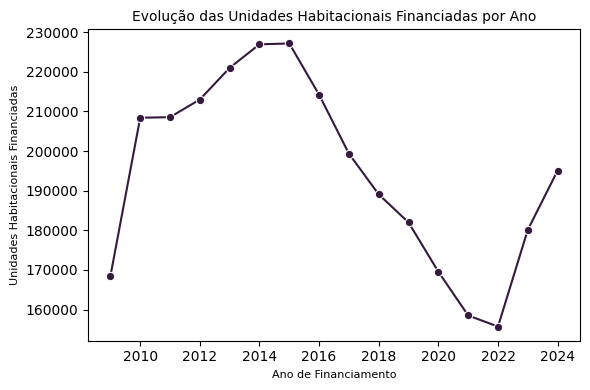

In [32]:
# Criação do Gráfico
sns.color_palette("rocket")
anos_uh_financiadas = df.groupby('num_ano_financiamento')['qtd_uh_financiadas'].sum()
plt.figure(figsize=(6, 4))
sns.lineplot(x=anos_uh_financiadas.index, y=anos_uh_financiadas.values, marker='o')
plt.title('Evolução das Unidades Habitacionais Financiadas por Ano', fontsize=10)
plt.xlabel('Ano de Financiamento', fontsize=8)
plt.ylabel('Unidades Habitacionais Financiadas', fontsize=8)
plt.tight_layout()
plt.show()

A seguir, são apresentados os dados estatísticos sobre os valores de financiamento e subsídio:

In [28]:
estatisticas = df[['vlr_financiamento', 'vlr_subsidio']].describe()
print(estatisticas)

       vlr_financiamento  vlr_subsidio
count       5.785900e+04  5.785900e+04
mean        1.175075e+07  2.135543e+06
std         8.610015e+07  1.015091e+07
min         1.500000e+03  0.000000e+00
25%         1.963055e+05  3.045561e+04
50%         8.038304e+05  1.485044e+05
75%         3.800174e+06  7.761737e+05
max         9.926335e+09  5.380884e+08


A análise revelou que o subsídio mínimo de alguns municípios atingiu zero. O gráfico a seguir detalha a distribuição desses municípios por estado.

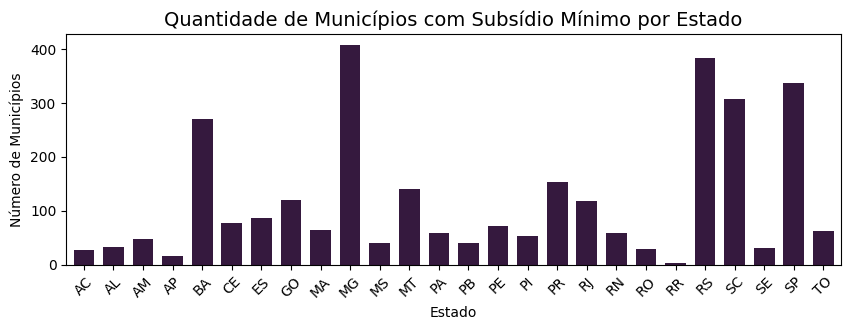

In [29]:
# Criação do Gráfico
min_por_estado = df[df['vlr_subsidio'] == 0].groupby('txt_uf').size()
sns.set_palette("rocket") 
plt.figure(figsize=(10, 3))
ax = min_por_estado.plot(kind='bar', rot=45, width=0.7)
plt.title('Quantidade de Municípios com Subsídio Mínimo por Estado', fontsize=14)
plt.xlabel('Estado', fontsize=10)
plt.ylabel('Número de Municípios', fontsize=10)
plt.show()

A ausência de subsídio em Minas Gerais apresentou o cenário mais crítico, com mais de 400 municípios afetados. O elevado número de unidades financiadas no estado pode ter contribuído para essa situação, ficando apenas atrás de São Paulo, com o maior número de unidades financiadas.

# **Interpretação dos Resultados**

A análise dos dados evidencia uma distribuição desigual de financiamentos habitacionais no Brasil, concentrando recursos em determinadas regiões e agravando as disparidades no acesso à moradia digna. Essa concentração, aliada à ausência de subsídios em algumas localidades, impacta negativamente o desenvolvimento urbano e social, perpetuando desigualdades e limitando o potencial de crescimento dessas áreas. A correlação entre o desenvolvimento econômico de um estado e a qualidade de suas habitações é evidente nos dados analisados. 